# Regression trees

Nett: https://www.youtube.com/watch?v=g9c66TUylZ4

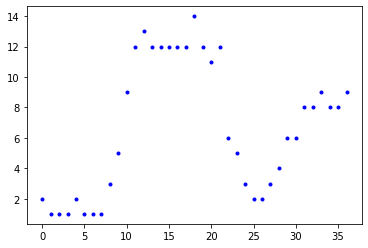

In [1]:
from pylab import *

y=[2, 1, 1, 1, 2, 1, 1, 1, 3, 5, 9, 12, 13, 12, 12, 12, 12, 12, 14, 12, 11, 12, 6, 5, 3, 2, 2, 3, 4, 6, 6, 8, 8, 9, 8, 8, 9];
x = arange(len(y))
plot(x,y,'b.');

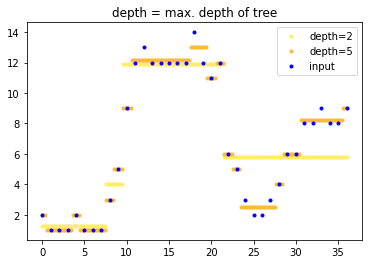

In [2]:
from sklearn.tree import DecisionTreeRegressor

d=[2,5]

regr_1 = DecisionTreeRegressor(max_depth=d[0])
regr_2 = DecisionTreeRegressor(max_depth=d[1])

X = array(x).reshape(len(x),1);
y = array(y).reshape(len(y),);
regr_1.fit(X, y)
regr_2.fit(X, y)

X_test = linspace(x.min(), x.max(),200).reshape((-1,1))
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

title("depth = max. depth of tree")
plot(X_test,y_1,'.', color='#ffee66', label=f"depth={d[0]}");
plot(X_test,y_2,'.', color='#ffbb33', label=f"depth={d[1]}");
plot(x,y,'b.', label='input')
legend();

In [13]:
# adapted from https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree

def get_code(tree, feature_names):
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, indent=0):
        if (threshold[node] != -2):
            print(" "*indent + "if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features,left[node], indent+2)
            print(" "*indent + "} else {")
            if right[node] != -1:
                recurse (left, right, threshold, features,right[node], indent+2)
            print(" "*indent + "}")
        else:
            print(" "*(indent) + "return " + str(value[node]))

    recurse(left, right, threshold, features, 0)

get_code(regr_1,['x','y'])

if ( x <= 9.5 ) {
  if ( x <= 7.5 ) {
    return [[1.25]]
  } else {
    return [[4.]]
  }
} else {
  if ( x <= 21.5 ) {
    return [[11.91666667]]
  } else {
    return [[5.8]]
  }
}
